Notebook created: 2018-04-03 03:48:34  
Generated from: _build_py/py/samuelson.rst  

In [1]:
from quantecon import LinearStateSpace
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SamuelsonLSS(LinearStateSpace):

    """
    this subclass creates a Samuelson multiplier-accelerator model
    as a linear state space system
    """
    def __init__(self,
                 y_0=100,
                 y_1=100,
                 α=0.8,
                 β=0.9,
                 γ=10,
                 σ=1,
                 g=10):

        self.α, self.β = α, β
        self.y_0, self.y_1, self.g = y_0, y_1, g
        self.γ, self.σ = γ, σ

        # Define intial conditions
        self.μ_0 = [1, y_0, y_1]

        self.ρ1 = α + β
        self.ρ2 = -β

        # Define transition matrix
        self.A = [[1,                 0,         0],
                  [γ + g,       self.ρ1,   self.ρ2],
                  [0,                 1,         0]]

        # Define output matrix
        self.G = [[γ + g, self.ρ1, self.ρ2],         # this is Y_{t+1}
                  [γ,           α,       0],         # this is C_{t+1}
                  [0,           β,      -β]]         # this is I_{t+1}

        self.C = np.zeros((3, 1))
        self.C[1] = σ  # stochastic

        # Initialize LSS with parameters from Samuleson model
        LinearStateSpace.__init__(self, self.A, self.C, self.G, mu_0=self.μ_0)

    def plot_simulation(self, ts_length=100, stationary=True):

        # Temporarily store original parameters
        temp_μ = self.μ_0
        temp_Σ = self.Sigma_0

        # Set distribution parameters equal to their stationary values for simulation
        if stationary == True:
            try:
                self.μ_x, self.μ_y, self.σ_x, self.σ_y = self.stationary_distributions()
                self.μ_0 = self.μ_y
                self.Σ_0 = self.σ_y
            # Exception where no convergence achieved when calculating stationary distributions
            except ValueError:
                print('Stationary distribution does not exist')

        x, y = self.simulate(ts_length)

        fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15, 8))
        titles = ['Output ($Y_t$)', 'Consumption ($C_t$)', 'Investment ($I_t$)']
        colors = ['darkblue', 'red', 'purple']
        for ax, series, title, color in zip(axes, y, titles, colors):
            ax.plot(series, color=color)
            ax.set(title=title, xlim=(0, ts_length)) # little caveat, we need to use ts_length, rather than n
            ax.grid()

        axes[-1].set_xlabel('Iteration')

        # Reset distribution parameters to their initial values
        self.μ_0 = temp_μ
        self.Sigma_0 = temp_Σ

        return fig

    def plot_irf(self, j=5):

        x, y = self.impulse_response(j)

        # Reshape into 3 x j matrix for plotting purposes
        yimf = np.array(y).flatten().reshape(j+1, 3).T

        fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15, 8))
        labels = ['$Y_t$', '$C_t$', '$I_t$']
        colors = ['darkblue', 'red', 'purple']
        for ax, series, label, color in zip(axes, yimf, labels, colors):
            ax.plot(series, color=color)
            ax.set(xlim=(0, j))
            ax.set_ylabel(label, rotation=0, fontsize=14, labelpad=10)
            ax.grid()

        axes[0].set_title('Impulse Response Functions')
        axes[-1].set_xlabel('Iteration')

        return fig

    def multipliers(self, j=5):
        x, y = self.impulse_response(j)
        return np.sum(np.array(y).flatten().reshape(j+1, 3), axis=0)

In [3]:
samlss = SamuelsonLSS()

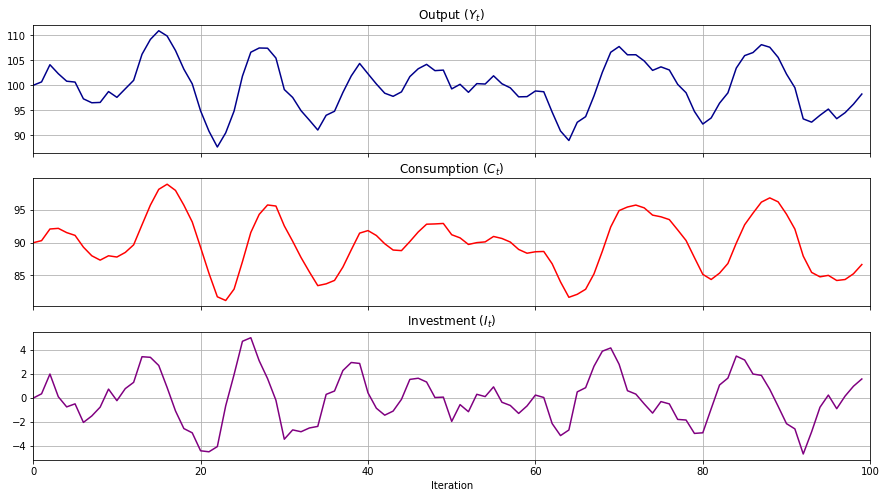

In [4]:
samlss.plot_simulation(100, stationary=False)
plt.show()

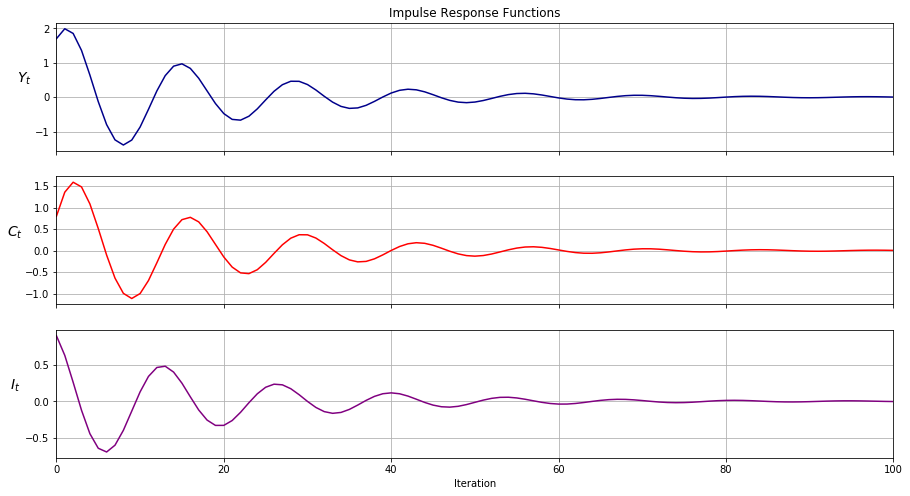

In [5]:
samlss.plot_irf(100)
plt.show()

In [6]:
samlss.multipliers()

array([7.414389, 6.835896, 0.578493])

In [7]:
pure_multiplier = SamuelsonLSS(α=0.95, β=0)

Stationary distribution does not exist


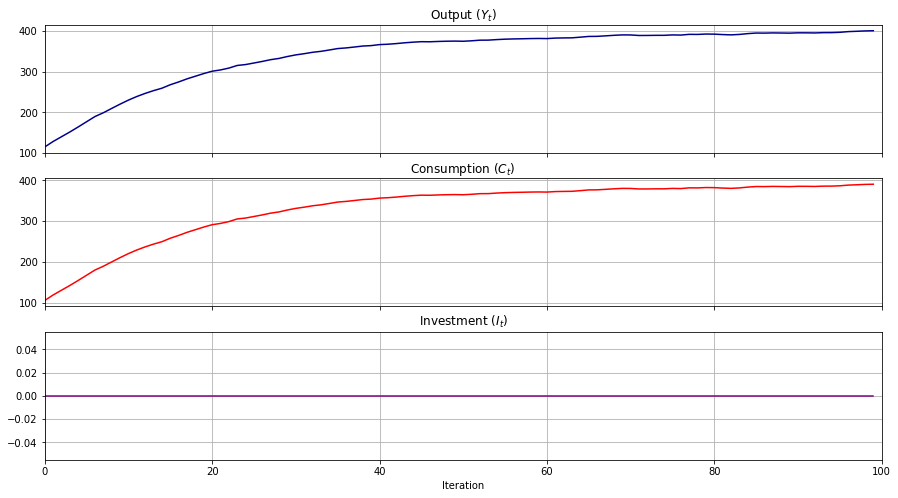

In [8]:
pure_multiplier.plot_simulation()
plt.show()

In [9]:
pure_multiplier = SamuelsonLSS(α=0.8, β=0)

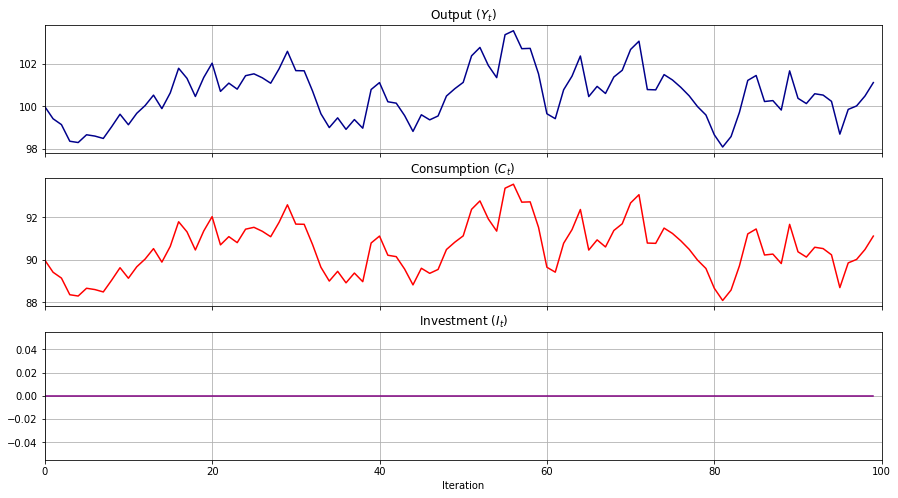

In [10]:
pure_multiplier.plot_simulation()
plt.show()

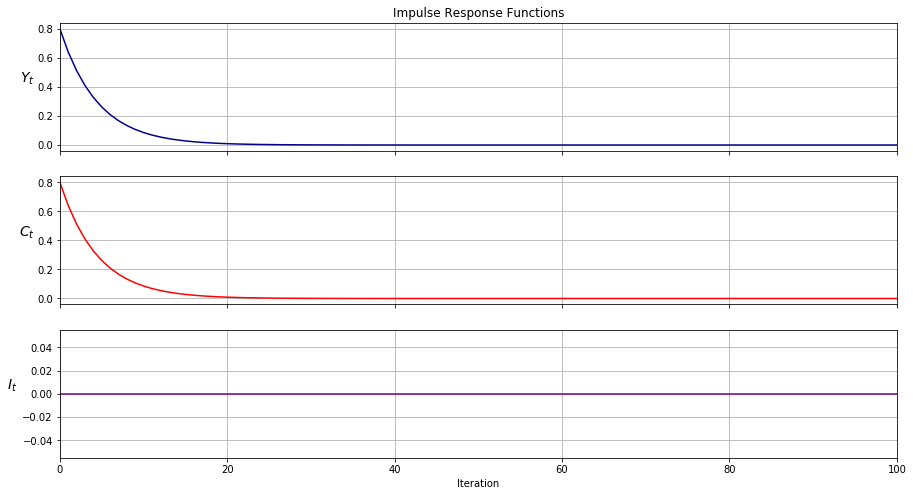

In [11]:
pure_multiplier.plot_irf(100)
plt.show()